# Web scraping meteo data and comparison with DIY sensor data

In this notebook, we will acquire data from another weather station (in Kozienice town) that is closer to where the DIY sensor is located (~14 km). Unfortunately, there is no historical data available for this station. We can only obtain data using the API that is from the last 48 hours. However, we will use this information to compare the accuracy of the DIY sensor with the official weather station located relatively nearby.  

### Web scraping

In [1]:
import requests

# API call which returns weather data for a specific weather station in JSON format  
page_url = 'https://hydro.imgw.pl/api/station/meteo/?id=351210488'
page = requests.get(page_url)
 

b'{"id":"351210488","name":"KOZIENICE","status":{"name":"351210488","description":"KOZIENICE","river":"Wis\xc5\x82a (2)","status":0,"precip":{"date":"2022-06-14T14:00:00Z","value":0.0000,"dreId":1523,"operationId":"OPAD_SUM_GODZ","parameterId":"B00606S","versionId":-1,"id":13231256242601},"precipDaily":{"date":"2022-06-14T06:00:00Z","value":4.9000,"dreId":1523,"operationId":"OPAD_SUM_DOB","parameterId":"B00604S","versionId":-1,"id":13231257175801},"precip3HoursSum":0.0,"precip6HoursSum":0.0,"precip12HoursSum":0.0,"precip24HoursSum":0.0,"maxDailyPrecipValue":81.1,"maxDailyPrecipDate":"2000-07-29","maxHourPrecipValue":3.4,"province":"mazowieckie","note":null},"state":"no-precip","connections":{"hydroUp":null,"hydroDown":null,"meteo":[{"item1":"251200150","item2":"Wisla_od_Sanu_do_Narwi","item3":"\xc5\x81AZISKA","item4":"meteo"},{"item1":"251200080","item2":"Wisla_od_Sanu_do_Narwi","item3":"BIA\xc5\x81OBRZEGI","item4":"meteo"}]},"hourlyPrecipRecords":[{"date":"2022-06-12T14:00:00Z","value

In [2]:
# Converting page response into more readable format of a JSON file

import json

x = json.loads(page.content)
print(json.dumps(x, indent=4))

{
    "id": "351210488",
    "name": "KOZIENICE",
    "status": {
        "name": "351210488",
        "description": "KOZIENICE",
        "river": "Wis\u0142a (2)",
        "status": 0,
        "precip": {
            "date": "2022-06-14T14:00:00Z",
            "value": 0.0,
            "dreId": 1523,
            "operationId": "OPAD_SUM_GODZ",
            "parameterId": "B00606S",
            "versionId": -1,
            "id": 13231256242601
        },
        "precipDaily": {
            "date": "2022-06-14T06:00:00Z",
            "value": 4.9,
            "dreId": 1523,
            "operationId": "OPAD_SUM_DOB",
            "parameterId": "B00604S",
            "versionId": -1,
            "id": 13231257175801
        },
        "precip3HoursSum": 0.0,
        "precip6HoursSum": 0.0,
        "precip12HoursSum": 0.0,
        "precip24HoursSum": 0.0,
        "maxDailyPrecipValue": 81.1,
        "maxDailyPrecipDate": "2000-07-29",
        "maxHourPrecipValue": 3.4,
        "province":

As you can see, the JSON file contains a lot of weather data, but we are only interested in the temperature. These data will be found under the JSON key - 'airTemperatureRecords'.

In [10]:
# Empty lists for storing relevant data from a JSON file
date = []
temp = []

# Getting datetime and temperature from a JSON file and appending them to a list
for i in range((len(x["airTemperatureRecords"])-1)):
    date.append(x["airTemperatureRecords"][i]['date'])
    temp.append(x["airTemperatureRecords"][i]['value'])

This is what the data extracted from JSON looks like

In [11]:
print(date)
print(temp)

['2022-06-12T14:00:00Z', '2022-06-12T15:00:00Z', '2022-06-12T16:00:00Z', '2022-06-12T17:00:00Z', '2022-06-12T18:00:00Z', '2022-06-12T19:00:00Z', '2022-06-12T20:00:00Z', '2022-06-12T21:00:00Z', '2022-06-12T22:00:00Z', '2022-06-12T23:00:00Z', '2022-06-13T00:00:00Z', '2022-06-13T01:00:00Z', '2022-06-13T02:00:00Z', '2022-06-13T03:00:00Z', '2022-06-13T04:00:00Z', '2022-06-13T05:00:00Z', '2022-06-13T06:00:00Z', '2022-06-13T07:00:00Z', '2022-06-13T08:00:00Z', '2022-06-13T09:00:00Z', '2022-06-13T10:00:00Z', '2022-06-13T11:00:00Z', '2022-06-13T12:00:00Z', '2022-06-13T13:00:00Z', '2022-06-13T14:00:00Z', '2022-06-13T15:00:00Z', '2022-06-13T16:00:00Z', '2022-06-13T17:00:00Z', '2022-06-13T18:00:00Z', '2022-06-13T19:00:00Z', '2022-06-13T20:00:00Z', '2022-06-13T21:00:00Z', '2022-06-13T22:00:00Z', '2022-06-13T23:00:00Z', '2022-06-14T00:00:00Z', '2022-06-14T01:00:00Z', '2022-06-14T02:00:00Z', '2022-06-14T03:00:00Z', '2022-06-14T04:00:00Z', '2022-06-14T05:00:00Z', '2022-06-14T06:00:00Z', '2022-06-14T07:

Saving data from JSON fle into a .csv file

In [12]:
import csv

with open('data/imgw_48h.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(date, temp))

Creating a dataframe from JSON data

In [3]:
import pandas as pd

In [17]:
df = pd.DataFrame({'date':date, 'temp':temp})
df.head()

,date,temp
0,2022-06-12T14:00:00Z,23.3
1,2022-06-12T15:00:00Z,24.5
2,2022-06-12T16:00:00Z,25.0
3,2022-06-12T17:00:00Z,24.4
4,2022-06-12T18:00:00Z,21.6


In [6]:
# Converting 'date' column values into datetime format

df['date'] = pd.to_datetime(df['date'])

We now have a prepared dataframe with data from the weather station. Now we need to prepare the data from the sensor in the same way. To do is:
- import data into a new dataframe
- convert data with constant and time to datetime
- select the same time range as the data from the weather station

In [7]:
# Data from the DIY sensor importing

data = pd.read_csv('data/nodemcu_log.csv')

In [8]:
data

,Date,Time,Temperature,Humidity
0,11-02-2021,19:30,23.4,21.4
1,11-02-2021,19:40,23.3,22.8
2,11-02-2021,19:50,22.9,20.8
3,11-02-2021,20:00,19.3,25.5
4,11-02-2021,20:10,17.9,28.2
...,...,...,...,...
76712,25-09-2022,10:20,13.7,99.9
76713,25-09-2022,10:30,14.0,99.9
76714,25-09-2022,10:40,14.2,99.9
76715,25-09-2022,10:50,14.3,99.9


In [9]:
# Merging data from two columns: Date and Temperature, then converting them into datetime format

data['date'] = pd.to_datetime(data[['Date','Time']].astype(str).apply(' '.join, 1), format='%d-%m-%Y %H:%M', errors='coerce')

In [25]:
data

,Date,Time,Temperature,Humidity,date
0,11-02-2021,19:30,23.4,21.4,2021-02-11 19:30:00
1,11-02-2021,19:40,23.3,22.8,2021-02-11 19:40:00
2,11-02-2021,19:50,22.9,20.8,2021-02-11 19:50:00
3,11-02-2021,20:00,19.3,25.5,2021-02-11 20:00:00
4,11-02-2021,20:10,17.9,28.2,2021-02-11 20:10:00
...,...,...,...,...,...
76712,25-09-2022,10:20,13.7,99.9,2022-09-25 10:20:00
76713,25-09-2022,10:30,14.0,99.9,2022-09-25 10:30:00
76714,25-09-2022,10:40,14.2,99.9,2022-09-25 10:40:00
76715,25-09-2022,10:50,14.3,99.9,2022-09-25 10:50:00


In [10]:
# Dropping unnecessary columns and changing column names

data = data[['date','Temperature']]
data = data.rename(columns={'Temperature':'temp'})
data

,date,temp
0,2021-02-11 19:30:00,23.4
1,2021-02-11 19:40:00,23.3
2,2021-02-11 19:50:00,22.9
3,2021-02-11 20:00:00,19.3
4,2021-02-11 20:10:00,17.9
...,...,...
76712,2022-09-25 10:20:00,13.7
76713,2022-09-25 10:30:00,14.0
76714,2022-09-25 10:40:00,14.2
76715,2022-09-25 10:50:00,14.3


In [11]:
# Selecting the same time period as in the station data

data = data.loc[(data["date"] >= '2022-06-12 14:00') & (data["date"] <= '2022-06-14 13:00')].reset_index()
data

,index,date,temp
0,62864,2022-06-12 14:00:00,29.9
1,62865,2022-06-12 14:10:00,28.8
2,62866,2022-06-12 14:20:00,29.3
3,62867,2022-06-12 14:30:00,29.9
4,62868,2022-06-12 14:40:00,29.1
...,...,...,...
278,63142,2022-06-14 12:20:00,20.5
279,63143,2022-06-14 12:30:00,20.1
280,63144,2022-06-14 12:40:00,21.3
281,63145,2022-06-14 12:50:00,20.2


### Comparison of the temperature from the DIY sensor and the IMGW weather station

Both dataframes have been prepared and now you we create a chart comparing the DIY sensor readings with the data from the official weather station.

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

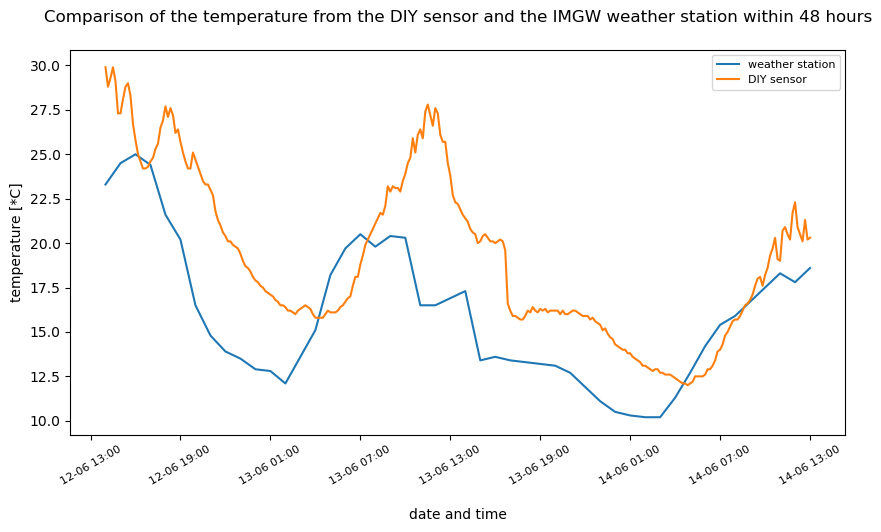

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

# Creating variables with relevant data
x1 = df['date']
y1 = df['temp']
x2 = data['date']
y2 = data['temp']

# Plotting the data on the chart
ax.plot(x1,y1)
ax.plot(x2,y2)

# Adding date and time labels
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))

# Adding the title, labels and the legend
plt.title('Comparison of the temperature from the DIY sensor and the IMGW weather station within 48 hours', pad=20)
plt.xlabel('date and time', labelpad=15)
plt.ylabel('temperature [*C]')

plt.xticks(fontsize=8, rotation=30)
plt.legend(['weather station','DIY sensor'], fontsize=8)

plt.show()

Observations and conclusions:
- The readings of the DY sensor are definitely higher than the data recorded by the weather station.
- However, the course of the lines of both charts is very similar, but there is a certain offset.
- The DHT22 sensor used is not a professional measuring device. It is also possible that the location of the sensor close to the house under the porch roof may cause inflated temperature readings. The maximum difference was 10 degrees.
